In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


## read aviris bands statistic

In [2]:
df_spectral = pd.read_csv(r"F:\wenqu\Aviris\Aviris_csv\aviris_spectra_combine.csv")
df_spectral

,file_name,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_10_21.tif,0.004095,0.008366,0.011143,0.012064,0.014178,0.016157,0.019465,0.019648,0.021816,...,0.032876,0.031840,0.031030,0.032435,0.039850,0.046477,0.122873,0.289441,0.113001,0.091605
1,site1b_10_24.tif,0.010162,0.017987,0.010830,0.017021,0.017567,0.016379,0.019352,0.020424,0.023193,...,0.026392,0.027079,0.032499,0.035687,0.030389,0.067178,0.088952,0.144447,0.125137,0.064748
2,site1b_10_25.tif,0.006902,0.009180,0.011334,0.013874,0.017388,0.015369,0.017985,0.020031,0.023258,...,0.036849,0.027824,0.032534,0.039909,0.032636,0.055107,0.040646,0.173911,0.154935,0.074669
3,site1b_10_26.tif,0.005427,0.008547,0.010773,0.014396,0.014228,0.014790,0.017349,0.020693,0.022823,...,0.031407,0.031854,0.035131,0.037115,0.037787,0.051414,0.072393,0.287284,0.121171,0.080450
4,site1b_10_27.tif,0.010331,0.012824,0.012874,0.013316,0.016856,0.018601,0.019378,0.022326,0.022935,...,0.030785,0.026421,0.027614,0.036539,0.034287,0.051169,0.111973,0.171473,0.108602,0.083328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,site6_9_46.tif,0.020958,0.028175,0.030020,0.027983,0.031116,0.034196,0.038520,0.039035,0.042405,...,0.051245,0.051572,0.051813,0.057562,0.056179,0.093329,0.155301,0.283692,0.180007,0.110812
3774,site6_9_47.tif,0.022712,0.006665,0.019463,0.022887,0.025820,0.022491,0.030423,0.033696,0.033015,...,0.051442,0.053151,0.045314,0.052819,0.055230,0.043774,0.181314,0.360806,0.173530,0.103716
3775,site6_9_48.tif,0.016615,0.020760,0.019618,0.030285,0.025423,0.025332,0.033006,0.035026,0.035339,...,0.046409,0.051305,0.047055,0.053254,0.056633,0.068974,0.301976,0.358733,0.087249,0.126770
3776,site6_9_49.tif,0.013209,0.015268,0.023017,0.024952,0.025642,0.024366,0.029840,0.032103,0.032674,...,0.047220,0.042169,0.039191,0.042309,0.048218,0.044921,0.251921,0.378305,0.092269,0.103659


## fit trait data into gaussian kernel and get ymax and y sigma

In [3]:
# la_trait_pdf_ymax = []
# la_trait_pdf_std = []
# # keep_file = []
# for file_name in df_spectral['file_name']:
#     print(file_name)
#     file_name = 'F:/wenqu/Aviris/combine/trait_map/'  + file_name
#     x_data = gdal.Open(file_name).ReadAsArray()
#     x_data = x_data[x_data>0].flatten()
    
#     # Calculate the PDF using KDE
#     kde = gaussian_kde(x_data)
#     x = np.linspace(np.min(x_data), np.max(x_data), 1000)
#     pdf = kde(x)

#     # Calculate the ymax and std
#     ymax = np.max(pdf)
#     com_ymax = [ymax, file_name]
    
# #     # Generate new data from the PDF using KDE
#     new_data = kde.resample(40000)[0]
#     # Calculate the std of the new data
#     std_new = np.std(new_data)
#     com_std = [std_new, file_name]
#     print(com_std)
    
# #     la_trait_pdf_ymax.append(com_ymax)
# #     la_trait_pdf_std.append(com_std)

## save ymax and y sigma (std) into a npy file

In [ ]:
np.save('D:/wenqu/PLSR/la_trait_pdf_ymax.npy', np.array(la_trait_pdf_ymax, dtype=object), allow_pickle=True)
np.save('D:/wenqu/PLSR/la_trait_pdf_std.npy', np.array(la_trait_pdf_std, dtype=object), allow_pickle=True)


## read npy data

In [4]:
la_trait_pdf_ymax = np.load('F:/wenqu/Aviris/Aviris_csv/ldmc_trait_pdf_ymax.npy',  allow_pickle=True)
la_trait_pdf_std = np.load('F:/wenqu/Aviris/Aviris_csv/ldmc_trait_pdf_std.npy',  allow_pickle=True)

## aviris bad bands removal

In [5]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [6]:
x_spectra = df_spectral[band_name]
x = x_spectra.to_numpy()

In [7]:
y = la_trait_pdf_ymax
y = np.array(y)
band_name = np.array(band_name)

In [8]:
y_std = la_trait_pdf_std
y_std = np.array(y_std)

In [9]:
y_std.shape, x.shape

((3778, 2), (3778, 319))

In [10]:
y

array([[19.242610256847886, 'site1b_ldmc_site1b_10_21.tif'],
       [34.17947646232253, 'site1b_ldmc_site1b_10_24.tif'],
       [30.011368102678535, 'site1b_ldmc_site1b_10_25.tif'],
       ...,
       [11.138575440675938, 'site6_ldmc_site6_9_48.tif'],
       [13.20200680015094, 'site6_ldmc_site6_9_49.tif'],
       [14.781888594895326, 'site6_ldmc_site6_9_50.tif']], dtype=object)

## extract labels from the list

In [11]:
labels = [] 
for i in range(len(y[:, 1])):
    substrings = y[:, 1][i].split("/")
    last_item = substrings[-1]
    site_name = last_item.split("_")[0]
    labels.append(site_name)

In [12]:
labels

['site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',

## leave one out cross validation ,they left one band out per time

In [13]:
def plot_mse_vs_components(X, y, max_comp):
    """
    Plot the number of PLS components vs. MSE.
    
    Parameters:
    X (numpy.ndarray): Array of predictor variables.
    y (numpy.ndarray): Array of response variable.
    max_comp (int): Maximum number of PLS components to use.
    
    Returns:
    None
    """
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1]))
    component = np.arange(1, max_comp)

    # Loop over the number of PLS components
    for i in range(max_comp):
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y[:, 0].astype(np.float64))
#         print(pls1.coef_.shape)
        

#         # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:, 0]))
        
        
    

#         # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        print(Xc.shape)
#         break

        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y[:, 0].astype(np.float64))
            y_cv = cross_val_predict(pls2, Xc[:, j:], y[:, 0].astype(np.float64), cv=5)
            mse[i, j] = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

        comp = 100 * (i+1) / max_comp
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    mseminx, mseminy = np.where(mse == np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ", mseminy[0])
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")

#     # Create plot of number of components vs. MSE
#     fig, ax = plt.subplots()
#     ax.plot(range(1, max_comp+1), mse[:, 0])
#     ax.set_xlabel('Number of PLS components')
#     ax.set_ylabel('MSE')
#     ax.set_title('Number of PLS components vs. MSE')
#     plt.show()
    
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y[:, 0].astype(np.float64))
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [14]:
opt_Xc, ncomp, wav, sorted_ind = plot_mse_vs_components(x, y_std, 20)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(3778, 319)
5% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed(3778, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(3778, 319)
75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(3778, 319)
80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(3778, 319)
85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(3778, 319)
90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(3778, 319)
95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(3778, 319)
100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  251
Optimised MSEP  0.00011452967062692971



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


## display the result by site categories: site1b - o-red, site2a-square-blue, site6-triangle-green

## plot with label legend

In [15]:

def simple_pls_cv_label_category(X, y, n_comp, labels):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)

    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'red'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'}
        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label, label_dict['site6'])['marker'],
                                     c=label_dict.get(label, label_dict['site6'])['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)

        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='blue', linewidth=1)
        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()


R2 calib: 0.623
R2 CV: 0.409
MSE calib: 0.000
MSE CV: 0.000


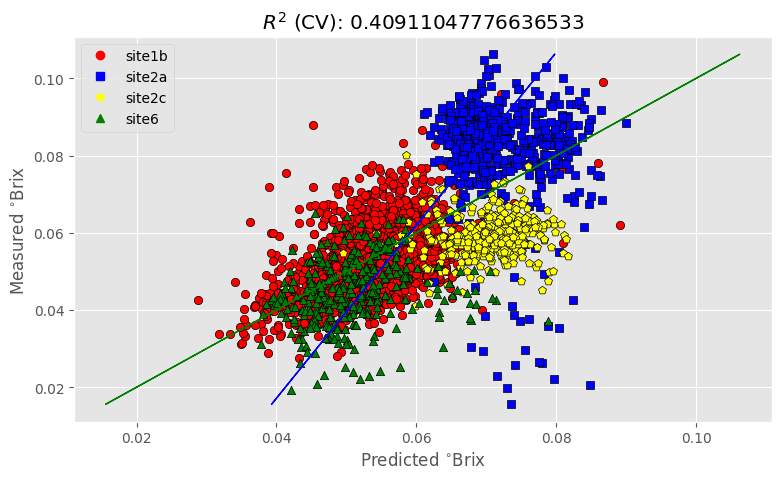

In [16]:
simple_pls_cv_label_category(opt_Xc, y_std, ncomp, labels)

# ldmc ymax

R2 calib: 0.477
R2 CV: 0.329
MSE calib: 19.375
MSE CV: 24.863


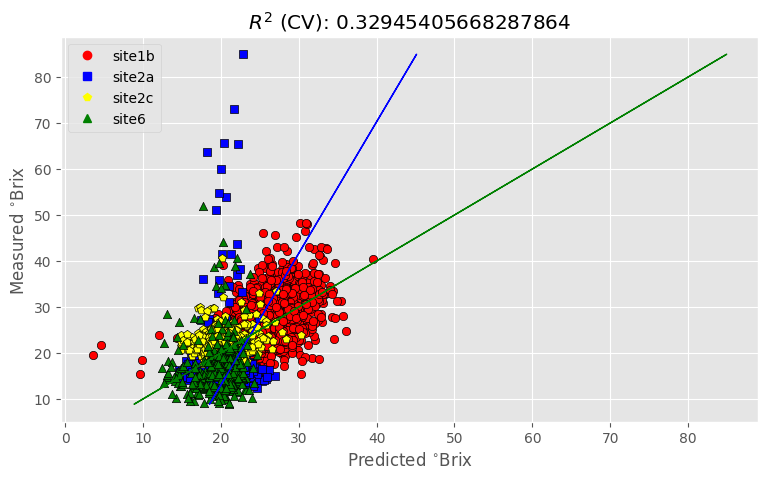

In [15]:
simple_pls_cv_label_category(opt_Xc, y, ncomp, labels)

# la std

R2 calib: 0.353
R2 CV: -0.063
MSE calib: 0.002
MSE CV: 0.003


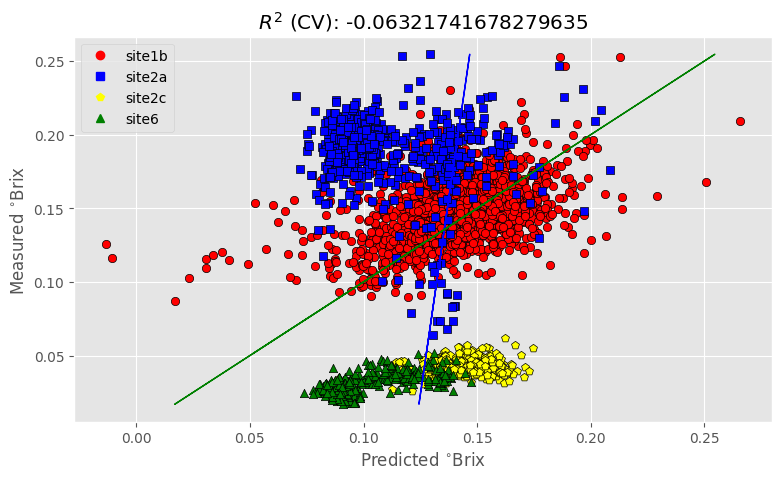

In [14]:

simple_pls_cv_label_category(opt_Xc, y_std, ncomp, labels)

# la_trait_pdf_ymax

R2 calib: 0.295
R2 CV: -0.002
MSE calib: 40.185
MSE CV: 57.117


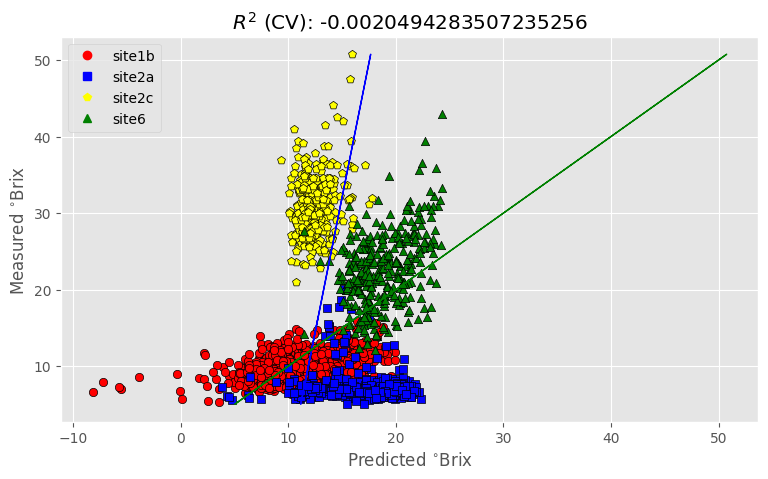

In [15]:
simple_pls_cv_label_category(opt_Xc, y, ncomp, labels)

R2 calib: 0.626
R2 CV: 0.477
MSE calib: 2.792
MSE CV: 3.905


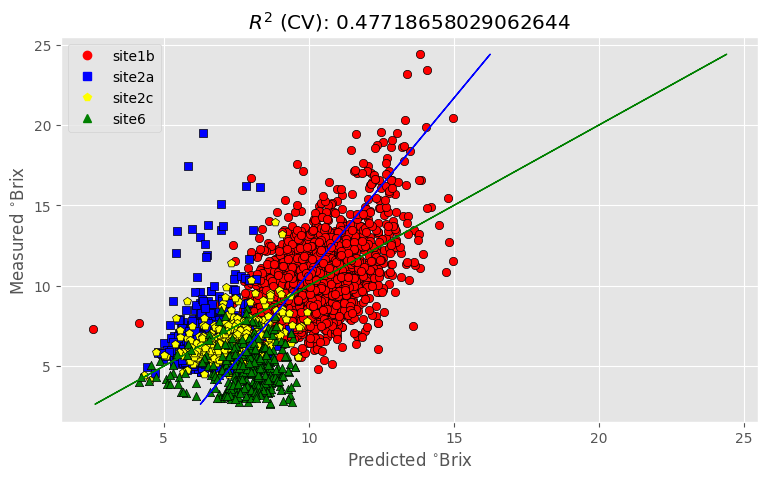

In [14]:
simple_pls_cv_label_category(opt_Xc, y, ncomp, labels)

# d15n_trait_pdf_std

R2 calib: 0.592
R2 CV: 0.528
MSE calib: 0.001
MSE CV: 0.001


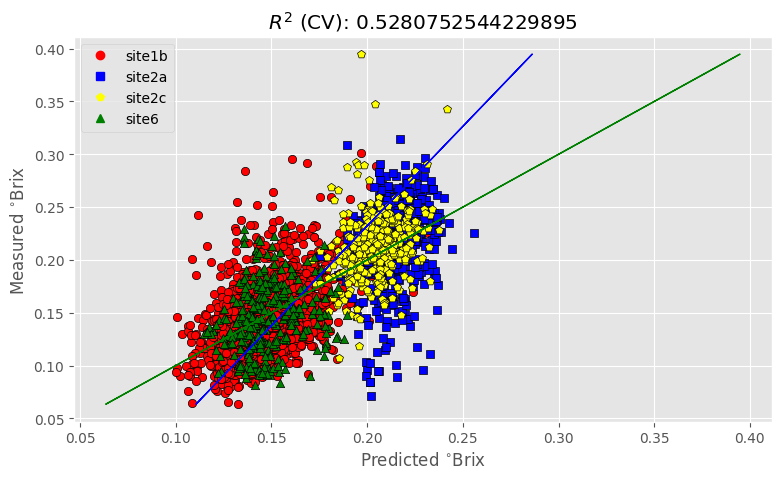

In [26]:
simple_pls_cv_label_category(opt_Xc, y_std, ncomp, labels)

# d13c

R2 calib: 0.274
R2 CV: -0.104
MSE calib: 0.001
MSE CV: 0.002


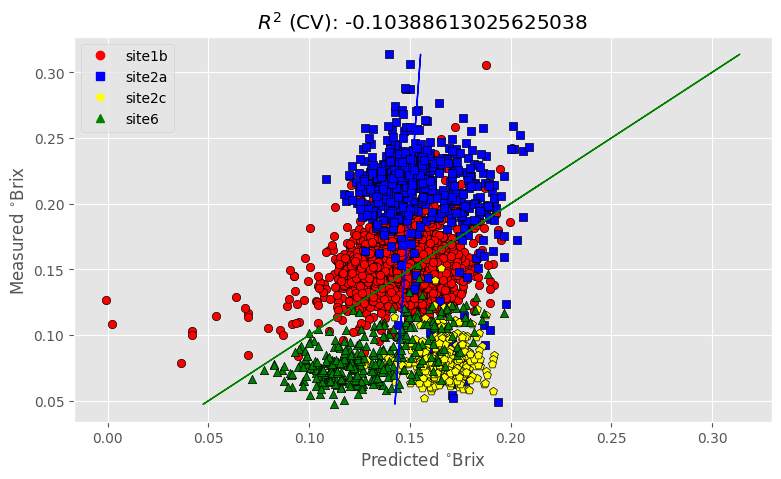

In [23]:
simple_pls_cv_label_category(opt_Xc, y, ncomp, labels)

R2 calib: 0.208
R2 CV: 0.011
MSE calib: 0.001
MSE CV: 0.002


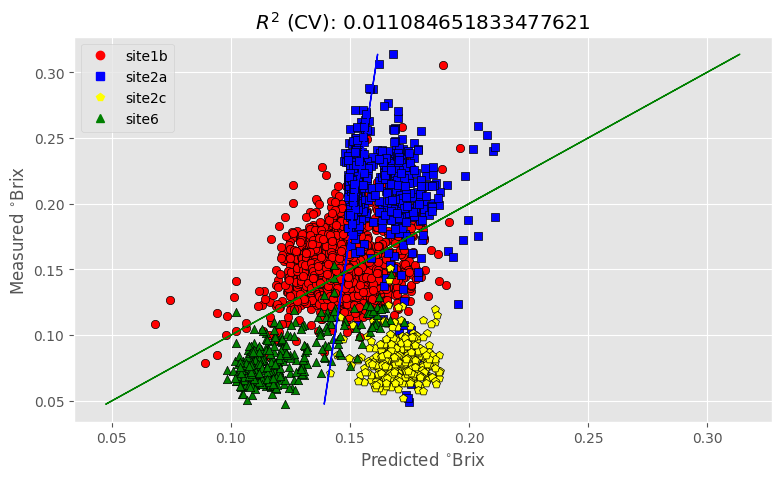

In [16]:
simple_pls_cv_label_category(opt_Xc, y, ncomp, labels)

## plot the points with color based on actual y value

In [20]:
def simple_pls_cv_yvalue(X, y, n_comp):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)
    print(y_c.shape)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    print(y_cv.shape[0])
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
        # Plot regression 
 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        
        cmap = plt.cm.get_cmap('magma')
        sc = ax.scatter(y_cv, y[:, 0].astype(np.float64), c=y[:, 0].astype(np.float64), cmap=cmap, edgecolors='k')
        cbar = plt.colorbar(sc)
        cbar.set_label('$^{\circ}$Brix')
        
        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='blue', linewidth=1)
        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()


(3576, 1)
3576
R2 calib: 0.443
R2 CV: 0.362
MSE calib: 2.409
MSE CV: 2.760


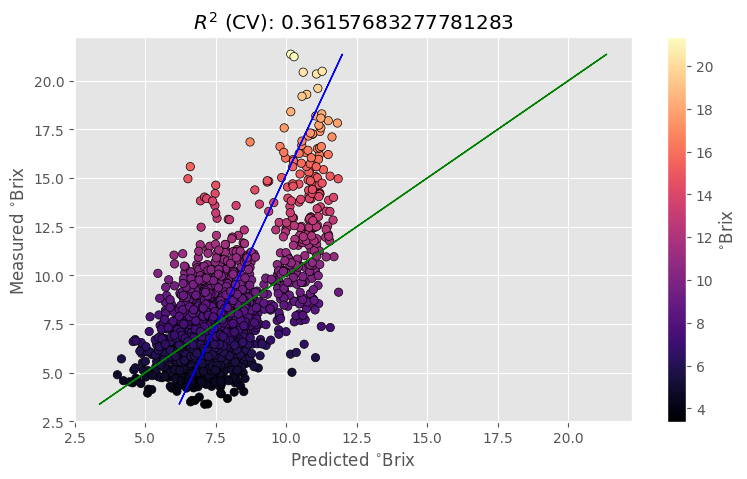

In [21]:
simple_pls_cv_yvalue(opt_Xc, y, ncomp)

## y desity map

In [22]:
def simple_pls_cv_ydensity(X, y, n_comp):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)
    print(y_c.shape)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    print(y_cv.shape[0])
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    # Calculate density of y values
    kde = gaussian_kde(y[:, 0].astype(np.float64))
    density = kde(y[:, 0].astype(np.float64))
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
        # Plot regression 
 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        
        cmap = plt.cm.get_cmap('coolwarm')
        sc = ax.scatter(y_cv, y[:, 0].astype(np.float64), c=density, cmap=cmap, edgecolors='k')
        cbar = plt.colorbar(sc)
        cbar.set_label('Density')
        
        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='blue', linewidth=1)
        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()


(3576, 1)
3576
R2 calib: 0.443
R2 CV: 0.362
MSE calib: 2.409
MSE CV: 2.760


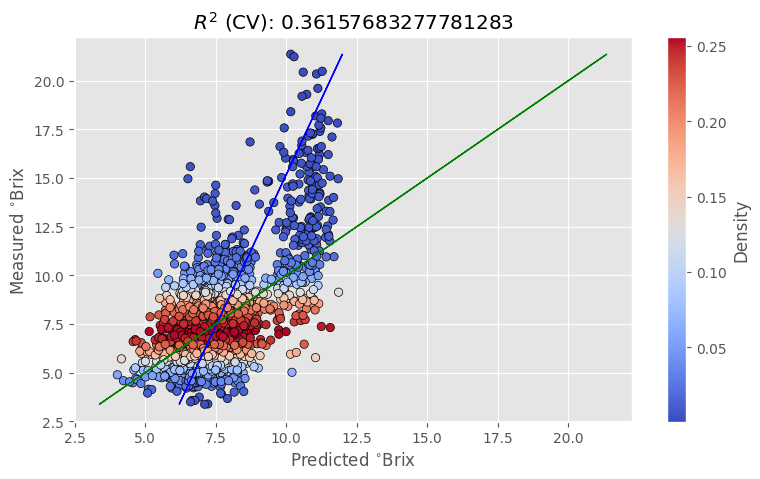

In [23]:
simple_pls_cv_ydensity(opt_Xc, y, ncomp)

In [24]:
y.shape

(3576, 2)

In [25]:
la_trait_pdf_ymax_boxcox, _ = stats.boxcox(la_trait_pdf_ymax[:, 0].astype(np.float64))
y_boxcox = la_trait_pdf_ymax_boxcox
y_boxcox = np.array(y_boxcox)
y_boxcox = np.expand_dims(y_boxcox, axis=1)
y_boxcox.shape
opt_Xc_1, ncomp_1, wav_1, sorted_ind_1 = plot_mse_vs_components(x, y_boxcox, 15)

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(3576, 319)
6% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  252
Optimised MSEP  0.003632748766413246



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


## site categories

R2 calib: 0.426
R2 CV: 0.321
MSE calib: 0.003
MSE CV: 0.004


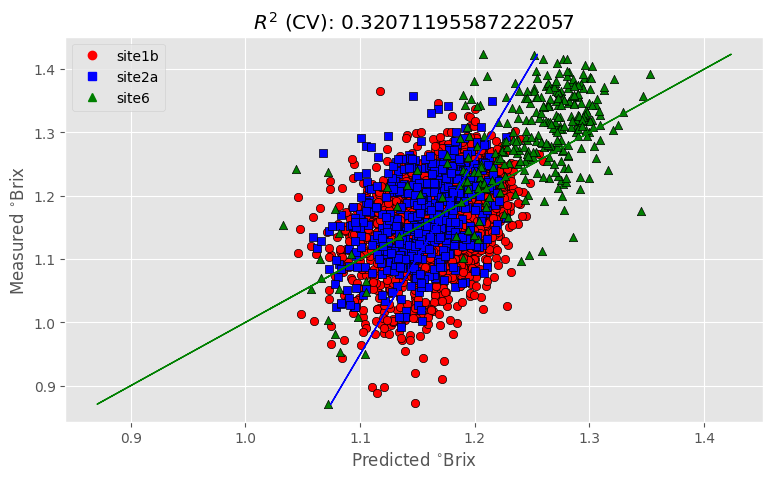

In [26]:
simple_pls_cv_label_category(opt_Xc_1, y_boxcox, ncomp_1, labels)

## density map

(3576, 1)
3576
R2 calib: 0.426
R2 CV: 0.321
MSE calib: 0.003
MSE CV: 0.004


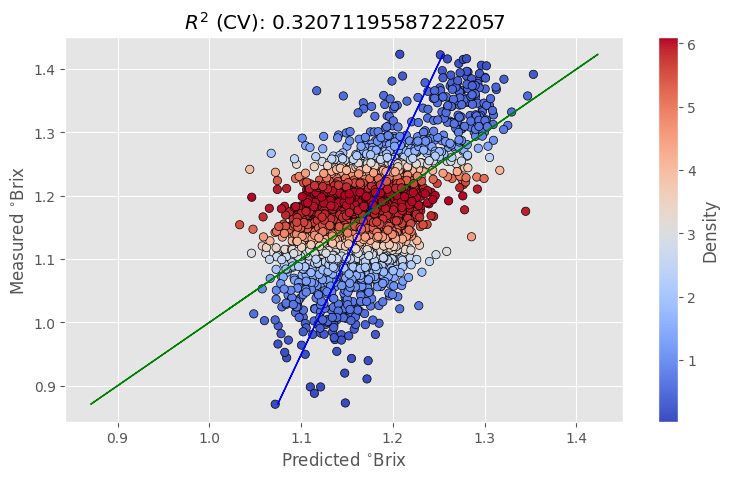

In [27]:
simple_pls_cv_ydensity(opt_Xc_1, y_boxcox, ncomp_1)

## y value range

(3576, 1)
3576
R2 calib: 0.426
R2 CV: 0.321
MSE calib: 0.003
MSE CV: 0.004


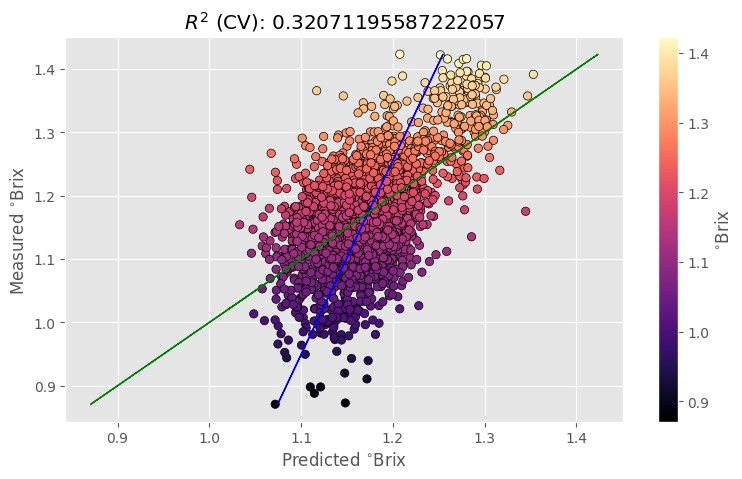

In [28]:
simple_pls_cv_yvalue(opt_Xc_1, y_boxcox, ncomp_1)

# model y sigma

In [29]:
opt_Xc_2, ncomp_2, wav_2, sorted_ind_2 = plot_mse_vs_components(x, y_std, 15)

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(3576, 319)
6% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(3576, 319)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  15
Wavelengths to be discarded  263
Optimised MSEP  9.694448290469877e-05



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.385
R2 CV: 0.287
MSE calib: 0.000
MSE CV: 0.000


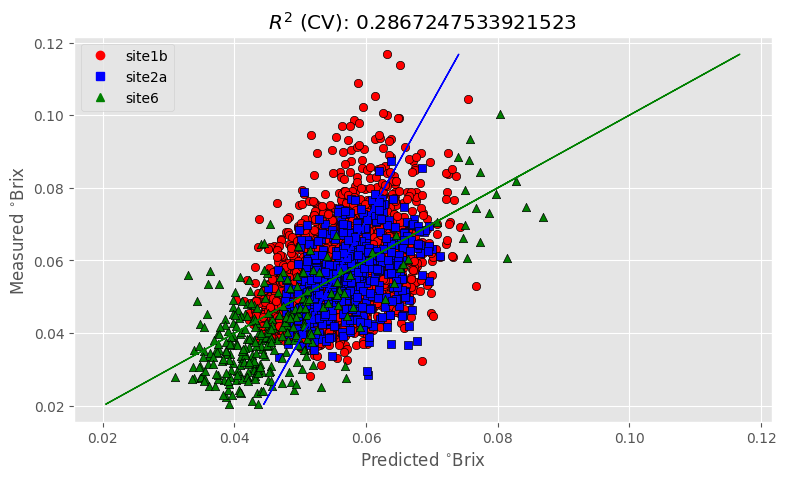

In [30]:
simple_pls_cv_label_category(opt_Xc_2, y_std, ncomp_2, labels)